# Лабораторная работа №2
# Хвойнов Олег
# Варинат 7

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DataSet=pd.read_csv('camera_dataset.csv')
print(DataSet.shape)

(1039, 13)


In [3]:
DataSet.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0


## 1. Визуализируем корреляцию между признаками с помощью headmap

In [4]:
DataSet=DataSet.dropna()
print(DataSet.shape)

(1037, 13)


In [5]:
DataSetNotString5=DataSet.drop([0])

In [6]:
DataSetNotString=DataSetNotString5.drop(['Model'], axis='columns')

In [7]:
DataSetNotString=DataSetNotString.astype(float)

<AxesSubplot:>

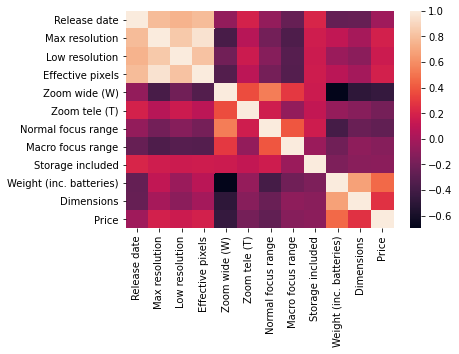

In [8]:
sns.heatmap(DataSetNotString.corr())

### Вывод. 
### Высокая степень корреляции наблюдается мужду:
- годом выпуска и макс. разрешением;
- годом выпуска и мин. разрешением;
- годом выпуска и эффективными пикселями;
- попарная корреляция между макс. разрешением, мин. разрешением и эффективными пикселями;
- весом и шириной зума;
- весом и размером.

## 2 Вычислим корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. 

#### Корреляция Пирсона:

In [9]:
l=['Price','Max resolution','Low resolution']
P=DataSetNotString[l].corr(method='pearson')
P

,Price,Max resolution,Low resolution
Price,1.000000,0.184201,0.154204
Max resolution,0.184201,1.000000,0.842790
Low resolution,0.154204,0.842790,1.000000


#### Корреляция Спирмена:

In [10]:
Sp=DataSetNotString[l].corr(method='spearman')
Sp

,Price,Max resolution,Low resolution
Price,1.000000,0.101815,0.150730
Max resolution,0.101815,1.000000,0.882074
Low resolution,0.150730,0.882074,1.000000


### Коэффициенты корреляции Пирсона и Спирмена находятся на низких значениях, а значит степень корреляции мала.

## Построим гистограммы для данных признаков

<AxesSubplot:xlabel='Price'>

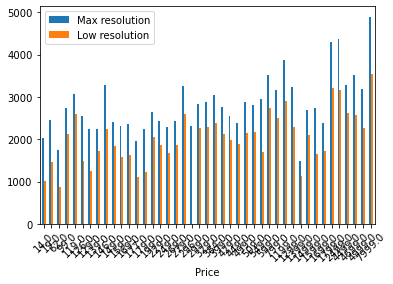

In [11]:
l1=['Max resolution','Low resolution']
DataSetNotString[l].groupby('Price').mean().plot(kind='bar',rot=45)

## 3. Построим график изменения средней цены на камеры по годам.

In [12]:
DataSetNotString1=DataSetNotString.astype(float)
RelPr=DataSetNotString1.groupby('Release date').mean()
RelPr

,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
Release date,,,,,,,,,,,
1994.0,1524.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1700.000000,170.000000,129.000000
1995.0,3060.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1700.000000,170.000000,129.000000
1996.0,784.000000,448.000000,0.000000,42.250000,57.000000,56.250000,14.750000,3.250000,347.500000,153.000000,554.000000
1997.0,849.454545,378.181818,0.181818,41.636364,70.727273,51.454545,19.545455,2.545455,311.818182,113.454545,367.181818
1998.0,1282.500000,546.000000,0.906250,31.875000,86.500000,43.968750,10.250000,4.781250,515.625000,122.531250,382.750000
1999.0,1470.339623,716.075472,1.132075,33.509434,89.207547,45.886792,10.339623,7.679245,429.433962,117.132075,349.641509
2000.0,1796.590164,1049.901639,1.901639,34.049180,111.786885,47.868852,9.540984,10.475410,399.737705,108.049180,482.442623
2001.0,1866.647059,1116.611765,2.094118,34.647059,104.952941,49.929412,9.011765,11.305882,410.141176,115.629412,635.188235
2002.0,2095.595506,1390.764045,2.741573,33.977528,105.853933,46.157303,9.988764,16.089888,340.685393,106.011236,552.370787


<AxesSubplot:xlabel='Release date'>

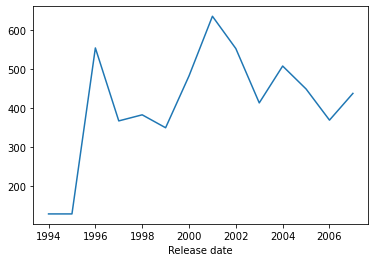

In [13]:
RelPr['Price'].plot()

## 4. . Определим компанию, камеры которой наиболее часто встречаются в наборе данных.

In [14]:
def get_name_company(Model):
    return Model.split(' ')[0].strip()

name_company=DataSet['Model'].apply(get_name_company)
DataSet['Name company']=name_company

In [15]:
DatCount=DataSet.groupby('Name company').count()

In [16]:
DatCount.loc[DatCount['Dimensions']==DatCount['Dimensions'].max()]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
Name company,,,,,,,,,,,,,
Olympus,122,122,122,122,122,122,122,122,122,122,122,122,122


### Из приведенного выше следует, что больше всех в таблице встречается компания Olympys

## 5. Добавим в набор данных признак, являющийся произведением двух других признаков.

In [17]:
DataSetNotString1['Dimensions_Weight']=DataSetNotString1['Dimensions']*DataSetNotString1['Weight (inc. batteries)']
DataSetNotString1

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Dimensions_Weight
1,1997.0,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,39900.0
2,1998.0,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,66360.0
3,2000.0,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,0.0
4,1999.0,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,0.0
5,1999.0,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,38400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2001.0,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0,38400.0
1035,2000.0,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0,45240.0
1036,2001.0,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0,36380.0
1037,2001.0,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0,36380.0


## 6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [18]:
DataSet2=pd.read_csv('camera_dataset.csv')
print(DataSet2.shape)

(1039, 13)


In [19]:
DataSet2=DataSet2.dropna()
print(DataSet2.shape)

(1037, 13)


## 7.Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.

In [20]:
DataSetNotString1['Model']=DataSetNotString5['Model']
DataSetNotString1['Model'].loc[DataSetNotString1['Price']==DataSetNotString1['Price'].max()]

53             Canon EOS-1Ds
54     Canon EOS-1Ds Mark II
55    Canon EOS-1Ds Mark III
Name: Model, dtype: object

## 8. Определим год, в который было выпущено максимально количество новых камер.

In [21]:
vv=DataSetNotString1.groupby('Release date').count()

In [22]:
vv.loc[vv['Dimensions']==vv['Dimensions'].max()]

,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Dimensions_Weight,Model
Release date,,,,,,,,,,,,,
2007.0,162,162,162,162,162,162,162,162,162,162,162,162,162


### Максимальное количество камер было выпущенно в 2007 году